In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [ ]:
df= pd.read_csv("/content/economic_index.csv")

In [ ]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [ ]:

#drop unnecessary columns
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [ ]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [ ]:
df.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


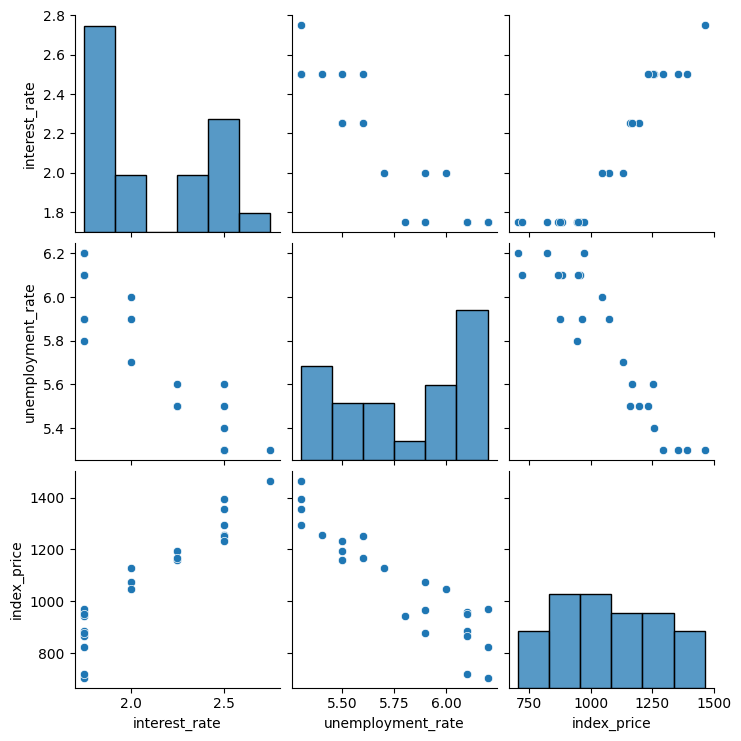

In [ ]:
#lets do some viualization
import seaborn as sns
sns.pairplot(df)

In [ ]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression
repr=LinearRegression()
repr.fit(x_train,y_train)

LinearRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(repr,x_train,y_train,scoring="neg_mean_squared_error",cv=5)

In [ ]:
score

array([-11956.11988397,  -3980.82968088,   -447.38408825,  -1495.38123485,
        -3231.51782411])

In [ ]:
#prediction
y_pred=repr.predict(x_test)

In [ ]:
y_pred

array([1023.32247097, 1062.29033293,  872.23516582,  950.17088973,
        930.68695875])

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)
print("Root Mean Squared Error:",rmse)

Mean Squared Error: 7720.064431558651
Mean Absolute Error: 69.89604208095452
Root Mean Squared Error: 87.86389720219933


assumption


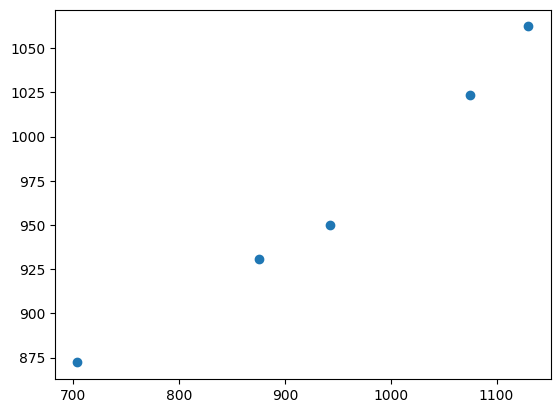

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
residuals=y_test-y_pred
print(residuals)

11     51.677529
10     67.709667
22   -168.235166
14     -7.170890
20    -54.686959
Name: index_price, dtype: float64


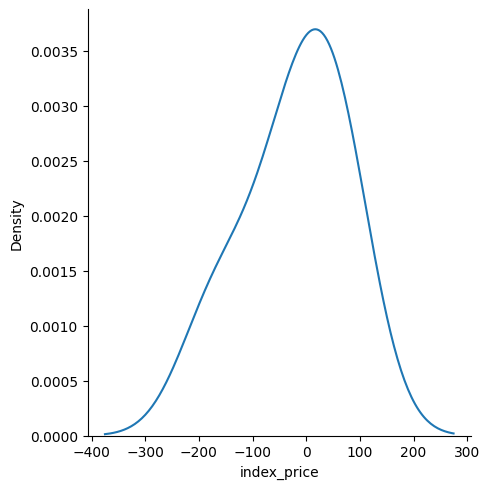

In [ ]:
sns.displot(residuals,kind="kde")

<Axes: ylabel='index_price'>

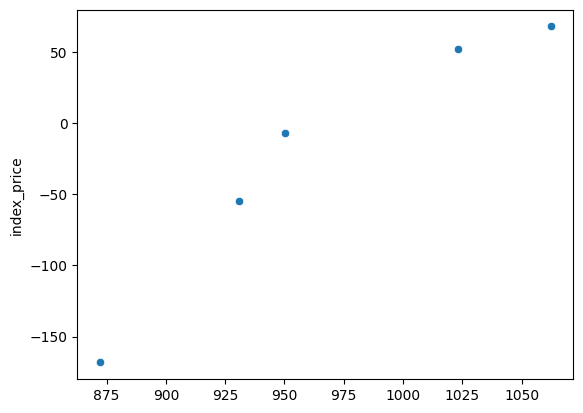

In [ ]:
sns.scatterplot(x=y_pred,y=residuals)